In [26]:
import pandas as pd
from pandas import DataFrame as df ,Series as sr


In [5]:
titanic_df=pd.read_csv('train.csv')

In [6]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
## Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
%matplotlib inline

In [ ]:
# Analysing number of People who survived and died


In [64]:

df_surv= titanic_df[titanic_df['Survived']==1]

df_surv_count=df_surv['Survived'].count()
df_dead_count=df_dead['Survived'].count()
df_dead=titanic_df[titanic_df['Survived']==0]
total=titanic_df['Survived'].count()
perc_s= (round ( (float(len(df_surv)) / (float(len(titanic_df))) * 100), 2))
perc_d= (round ( (float(len(df_dead)) / (float(len(titanic_df))) * 100), 2))

print("Analysis of Survival")
print ("Total people",total)
print("{0} people survived in titanic ".format(df_surv_count))
print("{0} people died in titanic ".format(df_dead_count))
print("{0} Percentage of people survived in titanic ".format(perc_s))
print("{0} Percentage of people survived in titanic ".format(perc_d))


Analysis of Survival
('Total people', 891)
342 people survived in titanic 
549 people died in titanic 
38.38 Percentage of people survived in titanic 
61.62 Percentage of people survived in titanic 


In [65]:
# Analysis of categorical features : Sex, Embarked

In [102]:
#titanic_df.pivot(index='Sex',columns='Survived',values='Class')
print('Count of people Survived on the basis of  {0}\n').format(df_surv.groupby('Sex').size())
print('Count of people Died on the basis of  {0}').format(df_dead.groupby('Sex').size())

#titanic_df.groupby('Sex')df_surv.value_counts()

Count of peopele Survived on the basis of  Sex
female    233
male      109
dtype: int64

Count of people Died on the basis of  Sex
female     81
male      468
dtype: int64


Text(0.5,1,'Pclass and Sex')

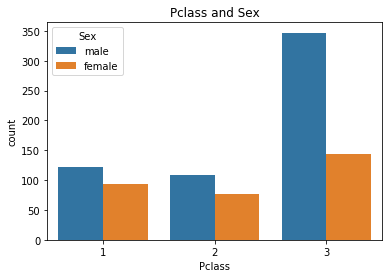

In [153]:
##sns.countplot('Sex',data=titanic_df,hue='Pclass')

#Analysing 
sns.countplot('Pclass',data=titanic_df,hue='Sex').set_title("Pclass and Sex")


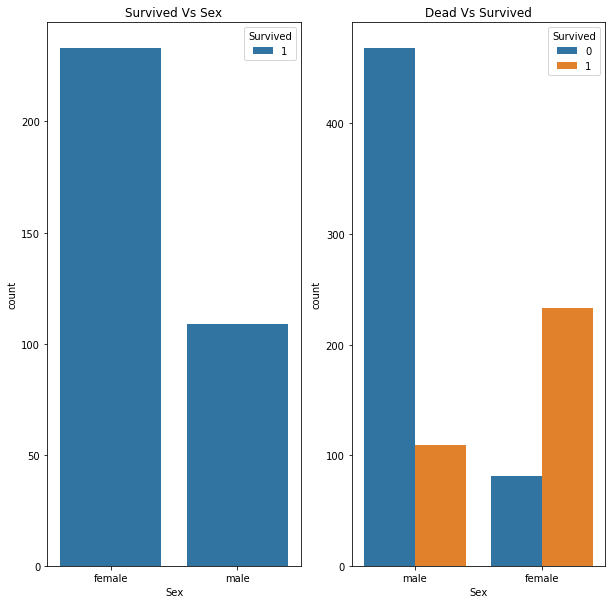

In [150]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
f,ax=pt.subplots(1,2,figsize=(10,10))
#titanic_df[['Sex','Survived']].groupby('Sex').size()
ax[0].set_title('Survived Vs Sex')
sns.countplot('Sex',hue='Survived',data=df_surv,ax=ax[0])
ax[1].set_title('Dead Vs Survived')
sns.countplot('Sex',hue='Survived',data=titanic_df,ax=ax[1])

pt.show()



In [110]:
def child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex


In [151]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(child,axis=1)

Text(0.5,1,'Number of PAssengers by class')

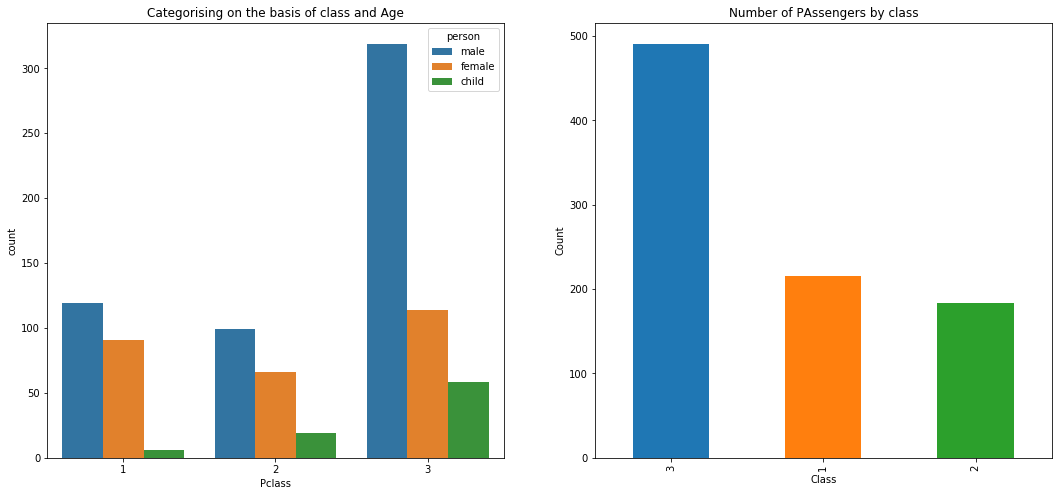

In [181]:
pd1 =pd.crosstab([titanic_df.Sex,titanic_df.Survived],titanic_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')
#print(pd1)
f,ax=pt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',data=titanic_df,hue='person',ax=ax[0]).set_title("Categorising on the basis of class and Age")
titanic_df['Pclass'].value_counts().plot.bar()
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Class')
ax[1].set_title('Number of PAssengers by class')


Text(0.5,1,'Pclass:Survived vs Dead')

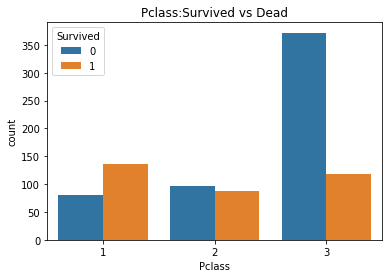

In [180]:

sns.countplot('Pclass',hue='Survived',data=titanic_df).set_title("Pclass:Survived vs Dead")
#titanic_df['Age'].hist(bins=70).set_title('Age')

In [128]:
titanic_df.groupby('person').size()

person
child      83
female    271
male      537
dtype: int64

C:\Users\vasudha\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


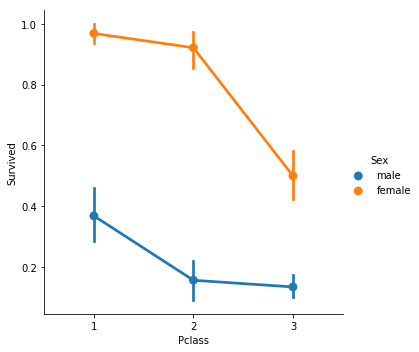

In [186]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df)

In [212]:
# Analysis based on Age


oldest=titanic_df['Age'].max()
youngest=titanic_df['Age'].min()
average =titanic_df['Age'].mean()
print("Oldest is {0}".format(oldest))
print("Youngest is {0}".format(youngest))
print("Average age  is {0}".format(average))

Oldest is 80.0
Youngest is 0.42
Average age  is 29.6991176471


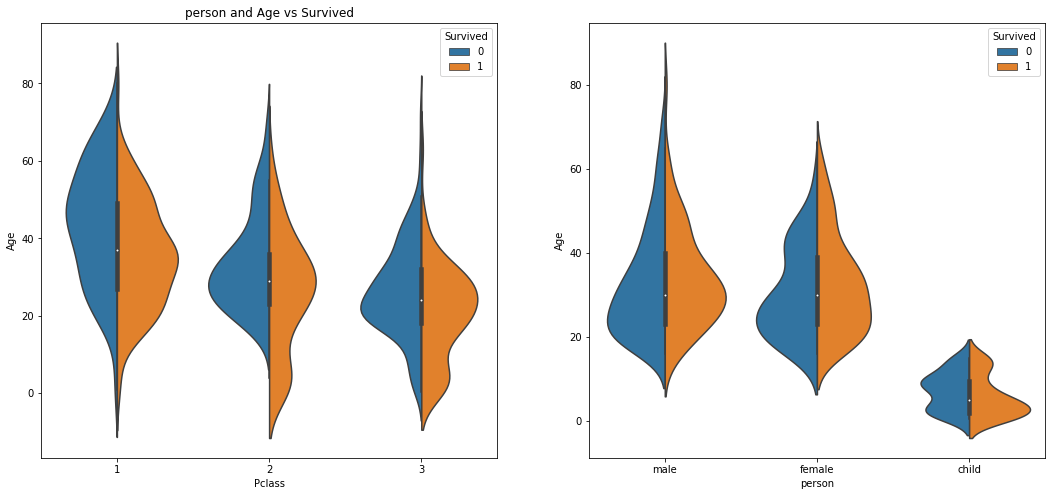

In [211]:
f,ax=pt.subplots(1,2,figsize=(18,8))
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot('Pclass','Age',data=titanic_df,hue='Survived',split=True,ax=ax[0])
ax[0].set_title('person and Age vs Survived')
sns.violinplot('person','Age',data=titanic_df,hue='Survived',split=True,ax=ax[1])

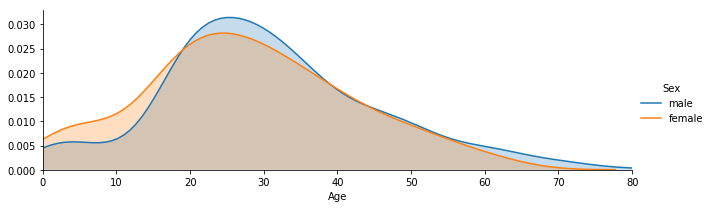

In [225]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend()

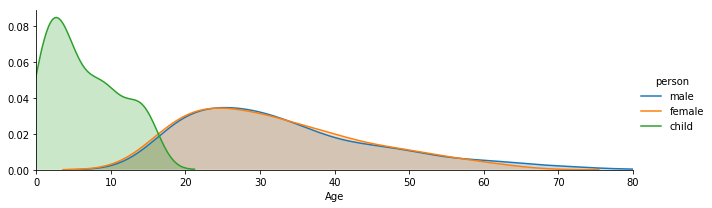

In [226]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend()

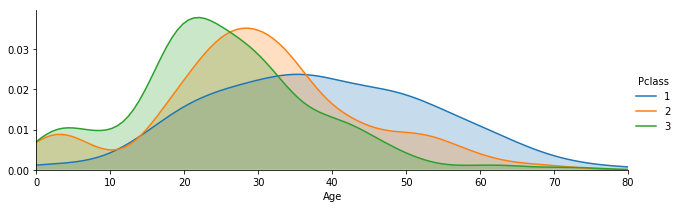

In [229]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend()

In [230]:
#Analysing what deck the passengers on and how does that relate to their class
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [231]:
deck=titanic_df['Cabin'].dropna()

In [233]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

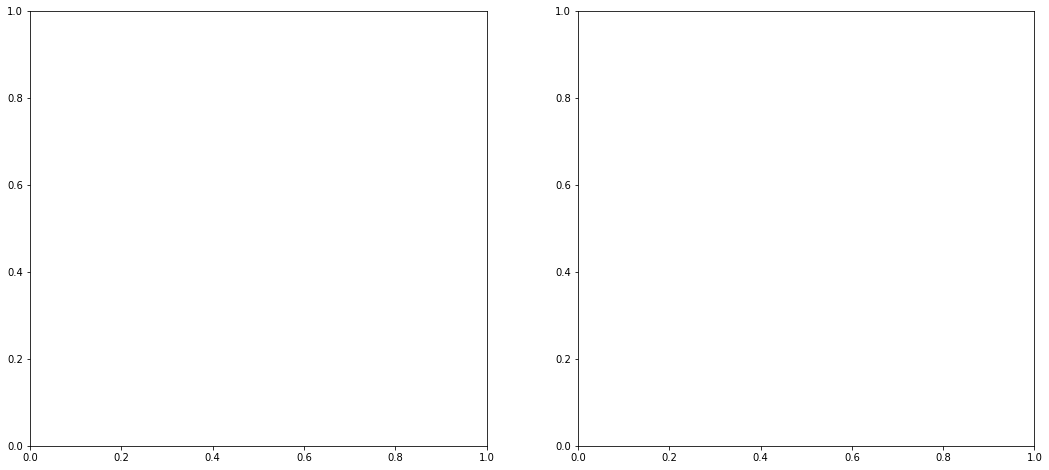

In [235]:
f,ax=pt.subplots(1,2,figsize=(18,8))

In [238]:
sns.countplot('Cabin','Survived',hue='Pclass',data=titanic_df)

TypeError: Cannot pass values for both `x` and `y`

In [276]:
titanic_df['Deck']=titanic_df['Cabin'].str.slice(0,1,1)

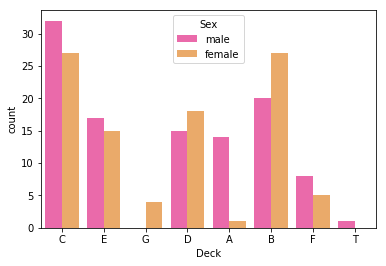

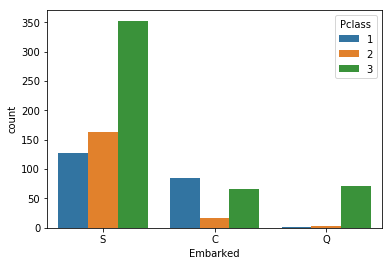

In [256]:
sns.countplot('Embarked',hue='Pclass',data=titanic_df)

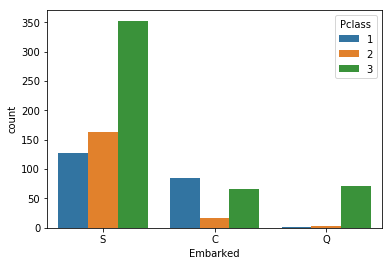

In [260]:
sns.countplot('Embarked',hue='Pclass',data=titanic_df)

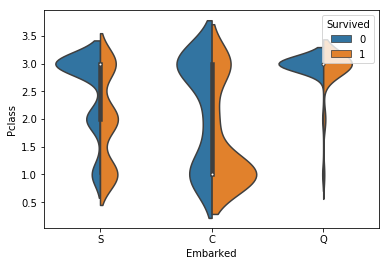

In [259]:
sns.violinplot('Embarked','Pclass', hue='Survived',data=titanic_df,split=True)

C:\Users\vasudha\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


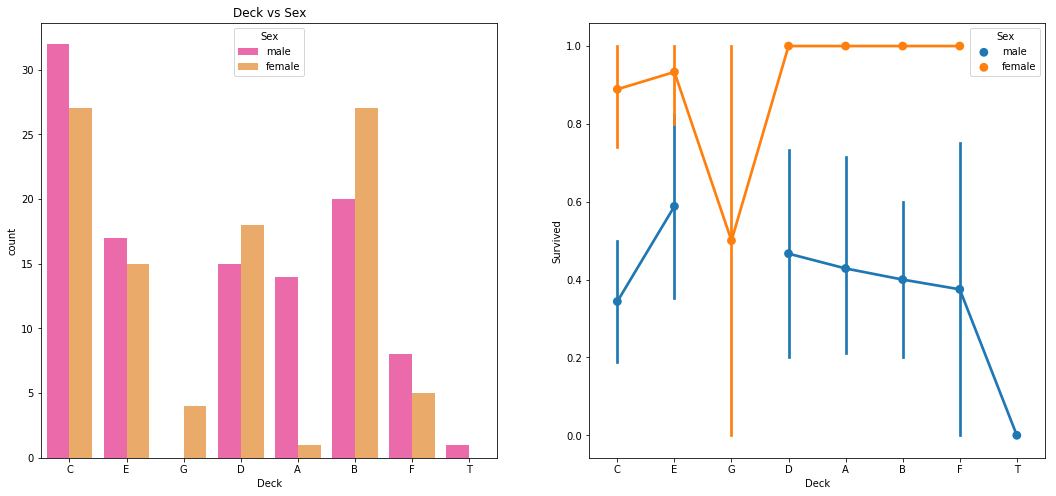

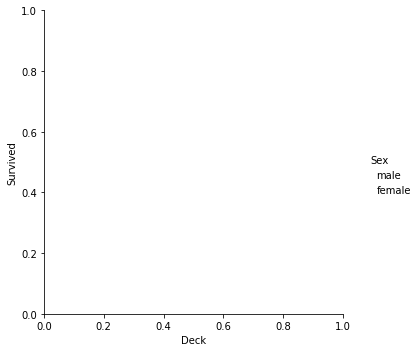

In [293]:
#Survival based on the Deck and the sex
f,ax=pt.subplots(1,2,figsize=(18,8))

sns.countplot('Deck',data=titanic_df,hue='Sex', palette='spring',ax=ax[0]).set_title('Deck vs Sex')
sns.factorplot('Deck','Survived',hue='Sex' ,data=titanic_df,ax=ax[1])
pt.show()

In [295]:
#Analysis of Survival based on the Family member

titanic_df['alone']=titanic_df.SibSp+titanic_df.Parch

In [296]:
titanic_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person deck_no Deck  alone  
0      0         A/5 21171   7.2500   NaN        S    male    C148  NaN      1  
1      0          PC 17599  71.2833   C85        C  female    C148    C      1  
2      0  STON/O2. 3101282   7.9250   NaN        S  female    C148  NaN      0  
3      0            113803  53.1000  C123        S  female    C148    C      1  
4      0            373450   8.0500   NaN        S    male    C148  NaN      0  
5      0            330877   8.4583   NaN        Q    male    C148  NaN      0  
6      0             17463  51.8625   E46        S    male    C148    E      0  
7      1            349909  21.0750   NaN        S   child    C148  NaN      4  
8      2            347742  11.1333   NaN        S  female    C148  NaN      2  
9      0            237736  30.0708   NaN        C   child    C148  NaN      1

In [300]:
titanic_df['alone'].loc[titanic_df['alone'] >0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone'] == 0] = 'Alone'

C:\Users\vasudha\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [301]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person deck_no Deck  \
0      0         A/5 21171   7.2500   NaN        S    male    C148  NaN   
1      0          PC 17599  71.2833   C85        C  female    C148    C   
2      0  STON/O2. 3101282   7.9250   NaN        S  female    C148  NaN   
3      0            113803  53.1000  C123        S  female    C148    C   
4      0            373450   8.0500   NaN        S    male    C148  NaN   

         alone  
0  With Family  
1  With Family  
2        Alone  
3  With Family  
4        Alone

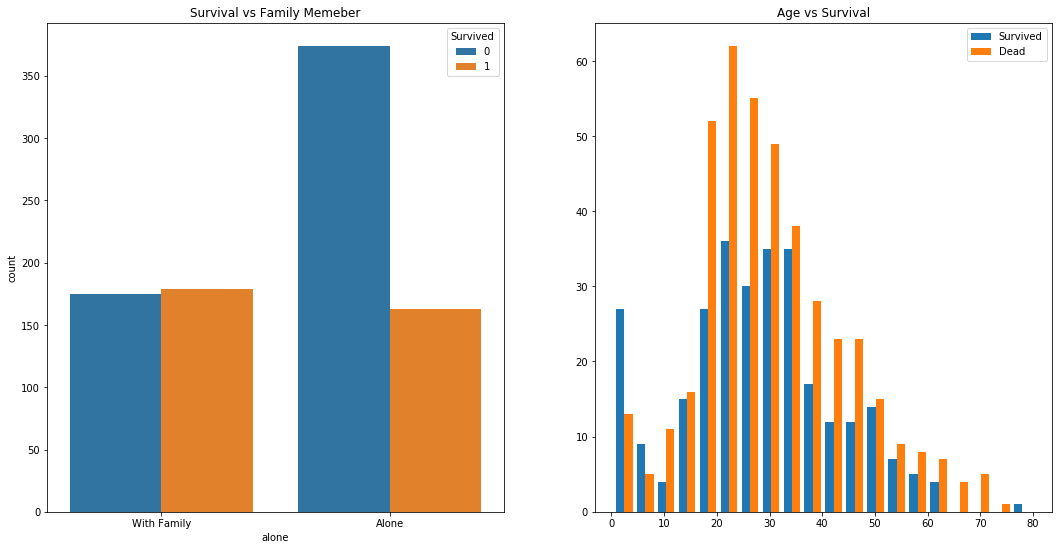

In [340]:
f,ax=pt.subplots(1,2,figsize=(18,9))
ax[0].set_title("Survival vs Family Memeber")
sns.countplot('alone',hue='Survived',data=titanic_df,ax=ax[0])
age_surv=titanic_df[titanic_df['Survived']==1].Age
age_dead=titanic_df[titanic_df['Survived']==0].Age
pt.hist([age_surv, age_dead], bins=20, label=['Survived', 'Dead'])
pt.title('Age vs Survival')

pt.legend(loc='upper right')
pt.show()
#age_surv.plot.hist(ax=ax[1],bins=20,edgecolor='black')